# Project: Wrangling and Analyze Data

## Data Gathering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
import glob

### In the cell below, I gathered **all** three pieces of data for this project and load them in the notebook. *
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### Reading the twitter_archive_enhanced.csv into a dataframe

In [2]:

df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open("image-predictions.tsv", mode='wb') as file:
    file.write(r.content)
    
df_image = pd.read_csv('image-predictions.tsv', sep ='\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). I used the provided tweet_json.txt provided on udacity./

In [4]:
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)


2356

In [5]:
#read data into data frame

df_tweet = pd.read_json('tweet_json.txt', lines ='True')
df_tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [6]:
#check the columns in df_tweet
df_tweet.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

#### Extracted the three columns into a dataframe needed from the entire dataframe 'df_tweet'

In [7]:
df_tweet_new = df_tweet[['id', 'retweet_count', 'favorite_count']]
df_tweet_new.head()

,id,retweet_count,favorite_count
0,892420643555336193,7010,33828
1,892177421306343426,5302,29341
2,891815181378084864,3482,22069
3,891689557279858688,7228,36955
4,891327558926688256,7765,35323


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing the dataframes programmatically

In [8]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#Check the index with notnull values in the retweeted_status_id column
index_list = list(np.where(df_twitter['retweeted_status_id'].notnull() == True)[0])
index_list 

[19,
 32,
 36,
 68,
 73,
 74,
 78,
 91,
 95,
 97,
 101,
 109,
 118,
 124,
 130,
 132,
 137,
 146,
 155,
 159,
 160,
 165,
 171,
 180,
 182,
 185,
 194,
 195,
 204,
 211,
 212,
 222,
 230,
 231,
 247,
 250,
 260,
 266,
 272,
 273,
 281,
 285,
 286,
 289,
 298,
 302,
 303,
 307,
 309,
 310,
 319,
 327,
 332,
 340,
 341,
 343,
 357,
 359,
 366,
 382,
 386,
 397,
 399,
 406,
 411,
 415,
 420,
 422,
 425,
 431,
 434,
 435,
 438,
 446,
 447,
 450,
 453,
 455,
 462,
 465,
 469,
 475,
 476,
 479,
 485,
 488,
 506,
 522,
 530,
 535,
 538,
 541,
 543,
 546,
 552,
 555,
 558,
 561,
 566,
 568,
 574,
 577,
 581,
 583,
 586,
 589,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 612,
 615,
 618,
 627,
 629,
 634,
 654,
 655,
 656,
 661,
 664,
 669,
 671,
 677,
 682,
 686,
 692,
 694,
 702,
 720,
 728,
 741,
 742,
 745,
 749,
 753,
 759,
 764,
 767,
 770,
 773,
 778,
 784,
 794,
 800,
 811,
 815,
 818,
 822,
 826,
 829,
 833,
 841,
 847,
 860,
 868,
 872,
 885,
 890,
 8

The two columns that follows asserts if the same index has nonull values in the three columns retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp

In [10]:
assert list(np.where(df_twitter['retweeted_status_user_id'].notnull()==True)[0]) ==  list(np.where(df_twitter['retweeted_status_id'].notnull() == True)[0])

In [11]:
assert list(np.where(df_twitter['retweeted_status_user_id'].notnull()==True)[0]) ==  list(np.where(df_twitter['retweeted_status_timestamp'].notnull()==True)[0]) 

In [12]:
index_list = list(np.where(df_twitter['retweeted_status_id'].notnull() == True)[0])
index_list 

[19,
 32,
 36,
 68,
 73,
 74,
 78,
 91,
 95,
 97,
 101,
 109,
 118,
 124,
 130,
 132,
 137,
 146,
 155,
 159,
 160,
 165,
 171,
 180,
 182,
 185,
 194,
 195,
 204,
 211,
 212,
 222,
 230,
 231,
 247,
 250,
 260,
 266,
 272,
 273,
 281,
 285,
 286,
 289,
 298,
 302,
 303,
 307,
 309,
 310,
 319,
 327,
 332,
 340,
 341,
 343,
 357,
 359,
 366,
 382,
 386,
 397,
 399,
 406,
 411,
 415,
 420,
 422,
 425,
 431,
 434,
 435,
 438,
 446,
 447,
 450,
 453,
 455,
 462,
 465,
 469,
 475,
 476,
 479,
 485,
 488,
 506,
 522,
 530,
 535,
 538,
 541,
 543,
 546,
 552,
 555,
 558,
 561,
 566,
 568,
 574,
 577,
 581,
 583,
 586,
 589,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 612,
 615,
 618,
 627,
 629,
 634,
 654,
 655,
 656,
 661,
 664,
 669,
 671,
 677,
 682,
 686,
 692,
 694,
 702,
 720,
 728,
 741,
 742,
 745,
 749,
 753,
 759,
 764,
 767,
 770,
 773,
 778,
 784,
 794,
 800,
 811,
 815,
 818,
 822,
 826,
 829,
 833,
 841,
 847,
 860,
 868,
 872,
 885,
 890,
 8

In [13]:
#Drop the indexes that has notnull values in the columns
df_twitter['retweeted_status_id'] = df_twitter['retweeted_status_id'].drop(index_list, axis=0, inplace =True)
df_twitter['retweeted_status_user_id'] = df_twitter['retweeted_status_user_id'].drop(index_list, axis=0, inplace =True)
df_twitter['retweeted_status_timestamp'] = df_twitter['retweeted_status_timestamp'].drop(index_list, axis=0, inplace =True)


In [15]:
df_twitter['retweeted_status_id'].value_counts(), df_twitter['retweeted_status_user_id'].value_counts(),df_twitter['retweeted_status_timestamp'].value_counts()

(Series([], Name: retweeted_status_id, dtype: int64),
 Series([], Name: retweeted_status_user_id, dtype: int64),
 Series([], Name: retweeted_status_timestamp, dtype: int64))

In [16]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(12)

In [21]:
df_twitter[:20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
df_twitter.duplicated().sum()

0

In [17]:
df_tweet_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
id                2326 non-null int64
retweet_count     2326 non-null int64
favorite_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [18]:
df_tweet_new.describe()

,id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.418097e+17,2473.153912,7059.960017
std,6.821785e+16,4187.777964,10969.475592
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,495.000000,1224.500000
50%,7.180382e+17,1150.000000,3053.500000
75%,7.986600e+17,2864.250000,8614.500000
max,8.924206e+17,70786.000000,144952.000000


In [19]:
df_tweet_new.sample()

,id,retweet_count,favorite_count
1833,675372240448454658,458,1532


In [20]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
1902,851861385021730816,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,miniature_pinscher,0.516284,True,kelpie,0.227402,True,vizsla,0.103246,True


In [22]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
all_columns = pd.Series(list(df_twitter) + list(df_image) + list(df_tweet_new))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues
1.datatype of timestamp should be datetime data type not object

2.incorrect format for expanded urls for example 'https://gofundme.com/ydvmve-surgery-for-jax,ht...'	

3.repeated urls in the expanded_url column in df_twitter

4.missing expanded_urls

5.in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp has many nan values.

6.indescribable column names p1, p1_conf, p1 dog, p2,....

7.some of the values in p1 column of the dataframe df_image_clean are in capital letters while others are in small letters

8.retweet_count and favorite_count has missing values after merging the dataframes

### Tidiness issues
1.the last four columns in df_twitter should be in a column

2.tweet_id in df_image and df_tweet should be merged to df_twitter

## Cleaning Data

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_tweet_new_clean = df_tweet_new.copy()
df_image_clean = df_image.copy()


### Issue #1:
the last four columns in df_twitter should be in a column

#### Define: 
Use melt function to melt the columns, drop the new column created and leave the value column that is returned, drop duplicates and fix the index.


#### Code

In [25]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [26]:
df_twitter_clean.shape

(2356, 17)

In [27]:
df_twitter_clean = pd.melt(df_twitter_clean, id_vars =['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'], value_vars =['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name ='dog_type')
df_twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,https://twitter.com/dog_rates/status/891087950...,13,10,None,doggo,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,https://twitter.com/dog_rates/status/890729181...,13,10,None,doggo,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,doggo,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo


In [28]:
df_twitter_clean.drop('dog_type', inplace = True, axis =1)


In [29]:
df_twitter_clean.drop_duplicates(inplace=True)

In [30]:
#set the index correctly
df_twitter_clean = df_twitter_clean.reset_index(drop=True)


In [31]:
df_twitter_clean = df_twitter_clean.rename(columns = {'value': 'dog_type'})

In [32]:
df_twitter_clean['dog_type'].replace(to_replace=['None'], value=np.nan, inplace =True)

In [33]:
df_twitter_clean['dog_type'].value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_type, dtype: int64

#### Test

In [34]:

df_twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [35]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 14 columns):
tweet_id                      2750 non-null int64
in_reply_to_status_id         87 non-null float64
in_reply_to_user_id           87 non-null float64
timestamp                     2750 non-null object
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2685 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          2750 non-null object
dog_type                      394 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 300.9+ KB


In [36]:
df_twitter_clean['dog_type'].value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_type, dtype: int64

### Issue #2:
tweet_id in df_image_clean and df_tweet_clean should be merged with df_twitter_clean


#### Define: 
We merge  the dataframes df_twitter_clean, df_image_clean and df_tweet_new_clean using the merge function on tweet_id

In [37]:
df_tweet_new_clean.shape


(2326, 3)

In [38]:
df_tweet_new_clean.rename(columns = {"id": "tweet_id"}, 
          inplace = True)
df_tweet_new_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33828
1,892177421306343426,5302,29341
2,891815181378084864,3482,22069
3,891689557279858688,7228,36955
4,891327558926688256,7765,35323


In [39]:
 from functools import reduce
dfs = [df_twitter_clean, df_tweet_new_clean, df_image_clean]
dfs_clean = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), dfs)
dfs_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Test

In [40]:
dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 27 columns):
tweet_id                      2750 non-null int64
in_reply_to_status_id         87 non-null float64
in_reply_to_user_id           87 non-null float64
timestamp                     2750 non-null object
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2685 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          2750 non-null object
dog_type                      394 non-null object
retweet_count                 2715 non-null float64
favorite_count                2715 non-null float64
jpg_url                       2409 non-null object
img_num                       2409 non-

### Quality Issues

### Issue #1:
Datatype of timestamp should be datetime data type not object

#### Define: 
Convert Timestamp to datetime data type using pandas

#### Code

In [41]:
dfs_clean['timestamp']= pd.to_datetime(dfs_clean['timestamp'])

#### Test

In [42]:
dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 27 columns):
tweet_id                      2750 non-null int64
in_reply_to_status_id         87 non-null float64
in_reply_to_user_id           87 non-null float64
timestamp                     2750 non-null datetime64[ns, UTC]
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2685 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          2750 non-null object
dog_type                      394 non-null object
retweet_count                 2715 non-null float64
favorite_count                2715 non-null float64
jpg_url                       2409 non-null object
img_num                   

## Issue #2:
missing expanded urls

#### Define: 
Fill in null values in the expanded url with the most occurred url format

#### Code

In [43]:
# Most of the url link in the expanded url contains this format
dfs_clean['expanded_urls'][28]

'https://twitter.com/dog_rates/status/887101392804085760/photo/1'

In [44]:
#Covert tweet_id to a list
tweet_id_list = list(dfs_clean['tweet_id'])

In [45]:
#Covert expanded_url to a list
expanded_url_list = list(dfs_clean['expanded_urls'])

In [46]:
#check if the length of the two columns are the same
len(expanded_url_list)== len(tweet_id_list)

True

In [47]:
#This for loop helps to fill in the null values with the url firmat created
for i in range(len(expanded_url_list)):
    if expanded_url_list[i] is np.nan:
        expanded_url_list[i] = ('https://twitter.com/dog_rates/status/{}/photo/1'.format(tweet_id_list[i]))

In [48]:
expanded_url_list

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1',
 'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitte

In [49]:
dfs_clean['expanded_urls'] = expanded_url_list

#### Test

In [50]:
dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 27 columns):
tweet_id                      2750 non-null int64
in_reply_to_status_id         87 non-null float64
in_reply_to_user_id           87 non-null float64
timestamp                     2750 non-null datetime64[ns, UTC]
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2750 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          2750 non-null object
dog_type                      394 non-null object
retweet_count                 2715 non-null float64
favorite_count                2715 non-null float64
jpg_url                       2409 non-null object
img_num                   

### Issue #3:
repeated values in expanded url column

#### Define:
Remove repeated values in expanded url column using the split method

#### Code

In [51]:
dfs_clean_split = dfs_clean['expanded_urls'].str.split(',', expand=True)[0]


In [52]:
dfs_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2745    https://twitter.com/dog_rates/status/666049248...
2746    https://twitter.com/dog_rates/status/666044226...
2747    https://twitter.com/dog_rates/status/666033412...
2748    https://twitter.com/dog_rates/status/666029285...
2749    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2750, dtype: object

In [53]:
 dfs_clean['expanded_urls']= dfs_clean_split

#### Test

In [54]:
dfs_clean['expanded_urls'][4]

'https://twitter.com/dog_rates/status/891327558926688256/photo/1'

### Issue #4:
incorrect format for expanded urls, for example, 'https://gofundme.com/ydvmve-surgery-for-jax,ht...'

#### Define  
Replace all values that does not startwith 'https://twitter.com/dog_rates/status' with 'https://twitter.com/dog_rates/status/{}/photo/1'.format(tweet_id_list[a]) by writing a for loop.

#### Code

In [55]:
tweet_id_list[0]

892420643555336193

In [56]:
expanded_urls_list = list(dfs_clean['expanded_urls'])
tweet_id_list = list(dfs_clean['tweet_id'])
corrected_expanded_urls_list = []

for a in range(len(expanded_urls_list)):
    if expanded_urls_list[a].startswith('https://twitter.com/dog_rates/status'):
        corrected_expanded_urls_list.append(expanded_urls_list[a])
    else:
        url = 'https://twitter.com/dog_rates/status/{}/photo/1'.format(tweet_id_list[a])
        corrected_expanded_urls_list.append(url)
        
        

In [57]:
dfs_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,https://gofundme.com/ydvmve-surgery-for-jax,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [58]:
dfs_clean['expanded_urls'] = corrected_expanded_urls_list


#### Test

In [59]:

dfs_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,https://twitter.com/dog_rates/status/890971913...,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Issue #5:
'in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp' has many null values

#### Define :
Drop columns 'in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp' 

#### Code

In [60]:
dfs_clean = dfs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [61]:
dfs_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #6:
undescriptive column names p1, p1_conf, p1 dog, p2,....

#### Define 
rename the indescribable column names p1, p1_conf, p1 dog, p2,....

#### Code

In [62]:
dfs_clean.rename(columns = {'p1':'img_predict_1','p1_conf':'predict_1_conf','p1_dog':'breed_predict_1'}, inplace =True)
dfs_clean.rename(columns = {'p2':'img_predict_2','p2_conf':'predict_2_conf','p2_dog':'breed_predict_2'}, inplace =True)
dfs_clean.rename(columns = {'p3':'img_predict_3','p3_conf':'predict_3_conf','p3_dog':'breed_predict_3'}, inplace =True)


#### Test

In [63]:
dfs_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,img_num,img_predict_1,predict_1_conf,breed_predict_1,img_predict_2,predict_2_conf,breed_predict_2,img_predict_3,predict_3_conf,breed_predict_3
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7010.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #7:
Upper and lower case letters in the prediction columns

#### Define
convert all the values in the predict columns to lower case letters

#### Code

In [64]:
dfs_clean['img_predict_1'] = dfs_clean['img_predict_1'].str.lower()
dfs_clean['img_predict_2'] = dfs_clean['img_predict_2'].str.lower()
dfs_clean['img_predict_3'] =dfs_clean['img_predict_3'].str.lower()

#### Test

In [65]:
dfs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,img_num,img_predict_1,predict_1_conf,breed_predict_1,img_predict_2,predict_2_conf,breed_predict_2,img_predict_3,predict_3_conf,breed_predict_3
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7010.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3482.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7228.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7765.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Issue #8:
nan values in the retweet_count and favorite_count columns

#### Define
fill the nan values for retweet_count and favorite_count columns with the mean of each column


#### Code

In [66]:
dfs_clean.retweet_count.isnull().sum()

35

In [67]:
dfs_clean['retweet_count'].mean(), dfs_clean['favorite_count'].mean()

(2604.63167587477, 7310.224309392265)

In [68]:
dfs_clean['retweet_count']= dfs_clean['retweet_count'].fillna(int(dfs_clean['retweet_count'].mean()))
dfs_clean['favorite_count']= dfs_clean['favorite_count'].fillna(int(dfs_clean['favorite_count'].mean()))

#### Test

In [69]:
dfs_clean.retweet_count.isnull().sum(), dfs_clean.retweet_count.isnull().sum()

(0, 0)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
dfs_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.The pupper has the highest count of the other dog_types

2.The img_num does not affect retweet_count or favorite_count

3.There is a positive correlation between retweet_count and favorite_count

### Visualization

In [71]:
import matplotlib.pyplot as plt
def plothist(column, x_label, y_label, diagram_title):
    column.hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(diagram_title)
    plt.show()

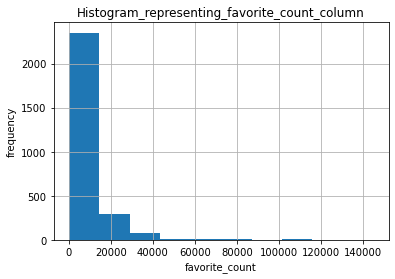

In [72]:
plothist(dfs_clean.favorite_count, 'favorite_count', 'frequency', 'Histogram_representing_favorite_count_column')

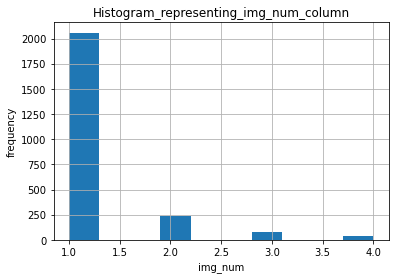

In [73]:
plothist(dfs_clean.img_num, 'img_num', 'frequency', 'Histogram_representing_img_num_column')


Text(0, 0.5, 'frequency')

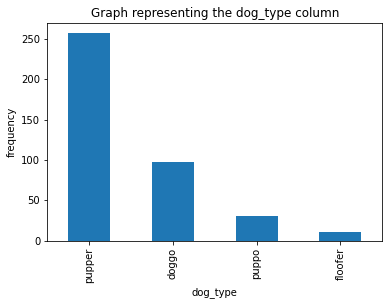

In [74]:
ax = dfs_clean.dog_type.value_counts().plot(kind = 'bar', title = 'Graph representing the dog_type column')
ax.set_xlabel('dog_type')
ax.set_ylabel('frequency')

In [75]:
def plotscatter(x,y, X, Y, diagram_title):
    plt.scatter(x,y)
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.title(diagram_title)
    plt.show()


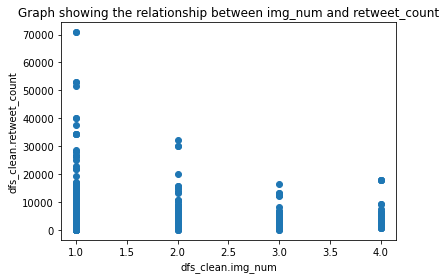

In [76]:
plotscatter(dfs_clean.img_num, dfs_clean.retweet_count, 'dfs_clean.img_num', 'dfs_clean.retweet_count', 'Graph showing the relationship between img_num and retweet_count')

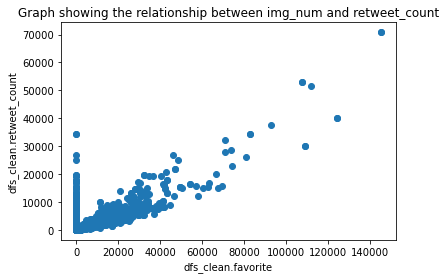

In [77]:
plotscatter(dfs_clean.favorite_count, dfs_clean.retweet_count, 'dfs_clean.favorite', 'dfs_clean.retweet_count', 'Graph showing the relationship between img_num and retweet_count')